Start: 0
0
Start: 122
983
Start: 1208
1883
Start: 2139
2828
Start: 3100
3783
Start: 4044
4706
Start: 4927
5524
Start: 5751
6411
Start: 6677
7354
Start: 7648
8323
Start: 8606
9260
Saving to ../report/imgs\sh_output.pdf


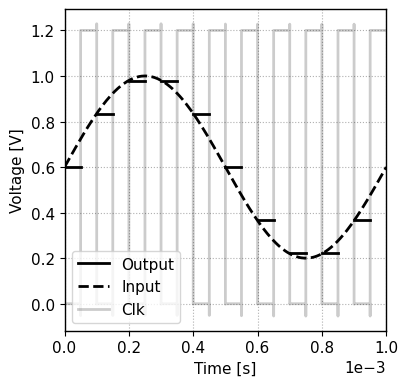

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

filename = "sh_tran.csv"
data = pd.read_csv(os.path.join(dir, filename))
t       = data["v /net1; tran (V) X"]
out     = data["v /VOUT; tran (V) Y"]
clk     = data["v /clk; tran (V) Y"]
vin     = data["v /net1; tran (V) Y"]

start = 0
end = 0
low = False
plot = True
first = True
for i in range(0, len(clk)):
    if clk[i] < 0.01 and not low:
        start = i
        low = True
    if clk[i] > 1.19 and low:
        end = i
        low = False
        plot = True
    if not low and plot:
        val = np.zeros_like(out[start:end])
        val += out[end]
        if first:
            ax.plot(t[start:end], val, linewidth = 2, color="black", label="Output")
            first = False
        else:
            ax.plot(t[start:end], val, linewidth = 2, color="black")
        print("Start: {}".format(start))
        print(end)
        plot = False

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0)) 
ax.plot(t, vin, linewidth = 2, color="black", label="Input", linestyle='--')
ax.plot(t, clk, linewidth = 2, color="black", label="Clk", alpha=0.2)

#ax.set_xlim(1, 1e8)
ax.set_box_aspect(1)
ax.legend(loc="lower left")
ax.grid(linestyle='dotted')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.set_xlim(0, 1e-3)
fig.tight_layout()

filename = "sh_output.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True

if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

dir = "report_data"
filename = "sh_tran.csv"
data = pd.read_csv(os.path.join(dir, filename))
t       = data["v /net1; tran (V) X"]
out     = data["v /VOUT; tran (V) Y"]
clk     = data["v /clk; tran (V) Y"]
vin     = data["v /net1; tran (V) Y"]

start = 0
end = 0
low = False
plot = True
first = True
points = []
time = []
for i in range(0, len(clk)):
    if clk[i] < 0.01 and not low:
        start = i
        low = True
    if clk[i] > 1.19 and low:
        end = i
        low = False
        plot = True
    if not low and plot:
        points.append(out[end])
        plot = False
points

[0.6000171190304203,
 0.6000164357462313,
 0.8333367875032621,
 0.976161313383636,
 0.9759413607702456,
 0.8330845602641882,
 0.6000332969943862,
 0.3657940433815013,
 0.2218104025592322,
 0.2218057486997744,
 0.3657619969915634]